# Logistic Regression - Binary Classification - Batch Gradient Descent


In this notebook, we use Scikit-Learn's **Batch Gradient Descent** algorithm for Logistic Regression to perform binary classification.


Scikit-Learn's LogisticRegression() model implements two variants of Gradient Descent algorithm: batch and stochastic. These variants specified by **solvers (optimization algorithms)**. 
- Solvers that implement batch GD: ‘liblinear’, ‘newton-cg’, ‘lbfgs’  
- Solvers that implement Stochastic GD: ‘sag’, ‘saga’ 

A suitable solver should be chosen based on the size and dimemsion of the dataset.


### Solvers:

- For a brief introduction to various solvers and how they influence the performance of a model, see the notebook **Logistic Regression-5-Gradient Descent Optimization Techniques**.
https://github.com/rhasanbd/Logistic-Regression-Comparative-Understanding/blob/master/Logistic%20Regression-6-Gradient%20Descent%20Optimization%20Techniques.ipynb

- To code a Logistic Regression Gradient Descent algorithm from scratch by using a solver, see the notebook **Unconstrained Optimization Algorithms-How To**.
https://github.com/rhasanbd/Logistic-Regression-Comparative-Understanding/blob/master/Unconstrained%20Optimization%20Algorithms-How%20To.ipynb



### Regularization

The Scikit-Learn LogisticRegression() model allows to apply regularization. The strength of the regularization is controlled by the hyperparameter C.


### Note on Setting the Hyperparameter C

The hyperparameter controlling the regularization strength of a Scikit-Learn LogisticRegression() model is not alpha (as in other linear models), but its inverse C. 

The higher the value of C, the less the model is regularized.

More on Scikit-Learn's LogisticRegression() class:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


# Dataset


We will use the iris dataset, which is a multivariate data set. 

This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

There are 4 features: 
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

Total number of samples: 150

The dataset is also known as Fisher's Iris data set as it was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis".


<img src="https://cse.unl.edu/~hasan/IrisFlowers.png" width=800, height=400>

## Binary Classification

We will use Scikit-Learn's LogisticRegression() model to detect the **Iris-Virginica** type.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

## Explore The Dataset

In [2]:
iris = load_iris()

# See the key values
print("\nKey Values: \n", list(iris.keys()))

# The feature names
print("\nFeature Names: \n", list(iris.feature_names))

# The target names
print("\nTarget Names: \n", list(iris.target_names))

# The target values (codes)
#print("\nTarget Values: \n", list(iris.target))


Key Values: 
 ['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

Feature Names: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target Names: 
 ['setosa', 'versicolor', 'virginica']


## Create Data Matrix (X) and the Label Array (y)

Recall that our goal is to detect the Iris-Virginica type. In the above Target array, the index for Virginica is 2.

Thus, we create a binary target vector by putting 1 if the target value is 2 (Iris-Virginica), else we put 0.

We can use all features or a subset. For this notebook, we will use two features (i.e., petal length, petal width).

In [3]:
# For the experimentation we use two features
X = iris["data"][:, (2, 3)]  # petal length, petal width

# Target Array
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0


print(X.shape)
print(y.shape)

print("\nX data type: ", X.dtype)
print("y data type: ", y.dtype)

(150, 2)
(150,)

X data type:  float64
y data type:  int64


## Split Data Into Training and Test Sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

## Standardize the Data

In [5]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Scikit-Learn LogisticRegression Attributes Settting

We need to set the following attributes to train a Logistic Regression binary classifier.

- penalty : ‘l1’, ‘l2’, ‘elasticnet’, ‘none’ (default=’l2’) The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties. ‘elasticnet’ is only supported by the ‘saga’ solver. If ‘none’ (not supported by the liblinear solver), no regularization is applied.


        If penalty is set to ‘elasticnet’, then we need to set the hyperparameter 'l1_ratio'
        
        
- l1_ratio : float, default=None. The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'. Setting l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'. For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.


- tol : Tolerance for stopping criteria. Default 1e-4.


- C : Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization. Default 1.0


- solver : ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default: ‘liblinear’. Algorithm to use in the optimization problem.

        -- For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

        -- For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.

        -- ‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas ‘liblinear’ and ‘saga’ handle L1 penalty.


- max_iter : Useful only for the newton-cg, sag and lbfgs solvers. Maximum number of iterations taken for the solvers to converge. Default 100


- multi_class : ‘ovr’, ‘multinomial’, ‘auto’. default: ‘ovr’. 
    -- If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.

# Binary Classification



## Model Selection for Binary Classifier: Hyperparameter Tuning

First, we need to find the optimal hyperparameters via Gridsearch.

- Solver: Note that we select the best solver for the batch Gradient Descent from ‘liblinear’, ‘newton-cg’, and ‘lbfgs’. The other two solvers ‘sag’ and ‘saga’ implement a variant of SGD. For this illustration we exclude the SGD solvers. 

In [6]:
%%time
param_grid = {'solver': ['liblinear', 'newton-cg', 'lbfgs'], 
              'tol': [1e-3, 1e-4], 'max_iter':[100, 500, 1000],'C': [0.1, 0.5, 1, 1.5, 2, 50, 100]}

lg_reg = LogisticRegression()

lg_reg_cv = GridSearchCV(lg_reg, param_grid, scoring='f1', cv=3, verbose=1, n_jobs=-1)
lg_reg_cv.fit(X_train, y_train)

params_optimal = lg_reg_cv.best_params_

print("Best Score (F1 score): %f" % lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)
print("\n")

Fitting 3 folds for each of 126 candidates, totalling 378 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s


Best Score (F1 score): 0.965432
Optimal Hyperparameter Values:  {'C': 0.5, 'max_iter': 100, 'solver': 'liblinear', 'tol': 0.001}


CPU times: user 436 ms, sys: 104 ms, total: 540 ms
Wall time: 2.04 s


[Parallel(n_jobs=-1)]: Done 378 out of 378 | elapsed:    2.0s finished


## Train the Optimal Logistic Regression Classifier

In [7]:
lg_reg_clf = LogisticRegression(**params_optimal)

lg_reg_clf.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.001, verbose=0,
                   warm_start=False)

## Weight Intercept and Coefficients

In [8]:
print("No. of Iterations:", lg_reg_clf.n_iter_ )
print("\nWeight Intercept:", lg_reg_clf.intercept_ )
print("Weight Coefficients:", lg_reg_clf.coef_ )

No. of Iterations: [5]

Weight Intercept: [-1.64731535]
Weight Coefficients: [[1.31873043 1.99610042]]


## Evaluate the Optimal Classifier 

In [9]:
y_train_predicted = lg_reg_clf.predict(X_train)


accuracy_score_train = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", accuracy_score_train)

print("\nTrain Confusion Matrix:")
print(confusion_matrix(y_train, y_train_predicted))

y_test_predicted = lg_reg_clf.predict(X_test)


accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", accuracy_score_test)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


precision_test = precision_score(y_test, y_test_predicted) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted)
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Train Accuracy:  0.9666666666666667

Train Confusion Matrix:
[[76  2]
 [ 2 40]]

Test Accuracy:  0.9666666666666667

Test Confusion Matrix:
[[21  1]
 [ 0  8]]

Test Precision = 0.888889
Test Recall = 1.000000
Test F1 Score = 0.941176

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.94      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



# Decision Bounday 

Logistic Regression is a **linear classifier**. 

To better understand how Logistic Regression creates linear decision boundary, we need to **<font color=red size=6> visualize </font>** it.

We provide three techniques for plotting the class decision boundary for a binary classification problem.

1. Using the Equation of Decision Boundary
2. Using Various Thresholds for a Class Probability 
3. Using Class Prediction 

The 1st technique is handy for binary classification problems. It helps us to understand the math for constructing the decision boundary.

The 2nd technique is useful for understanding the decision boundaries at various thresholds. It reveals the scope of the solution space.

The 3rd technique is simple and easy to extend for non-linear dataset. We will use it more often.


## 1. Decision Bounday: Using the Equation of Decision Boundary

To draw the decision boundary we use its equation.

The equation for the decision boundary for a single 2D data point is:

$\vec{w^T}.\vec{x} = 0$

$=> w_0*x_0 + w_1*x_1 + w_2*x_2 = 0$

$=> b + w_1*x_1 + w_2*x_2 = 0$ [denote the intercept $w_0 = b$ and $x_0 = 1$]

$=>  w_2*x_2 = -(b + w_1*x_1)$

$=> x_2 = -(b + w_1*x_1)/w_2$

- By using a range of values for $x_1$, we generate the range of $x_2$ values. 
- Then, we plot the decision boundary by using $x_1$ and $x_2$ values.

We write a function to plot the decision boundary using the above equation.

The weight vector $\vec{w}$ and the intercept $b$ values can be obtained by using the following two model functions respectively: 
 - coef_

- intercept_


In [10]:
def decision_boundary_equation_based(clf, X):
    
    xmin, xmax = X.min() - 1, X.max() + 1
    
    w = clf.coef_[0] # We use index 0 to return a list from a 1 x 2 coef_ matrix
    b = clf.intercept_[0] 

    x1 = np.linspace(xmin, xmax, 100)
    decision_boundary = -(b + w[0]*x1)/w[1]
    plt.plot(x1, decision_boundary, "k--", linewidth=3)

## Training Data Decision Boundary: Equation Based

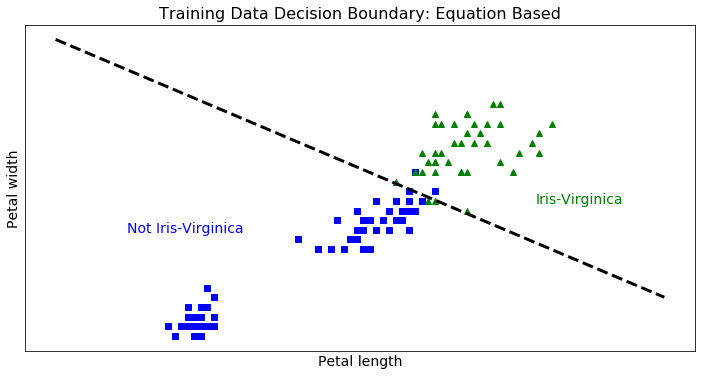

In [11]:
plt.figure(figsize=(12, 6))

plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], "bs")
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], "g^")

decision_boundary_equation_based(lg_reg_clf, X_train)

plt.text(-1.5, -0.1, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(2.0, 0.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("Training Data Decision Boundary: Equation Based", fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

## Test Data Decision Boundary: Equation Based

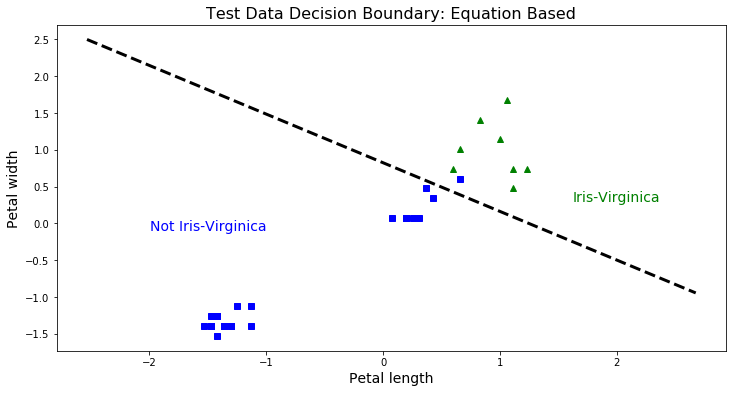

In [12]:
plt.figure(figsize=(12, 6))

plt.plot(X_test[y_test==0, 0], X_test[y_test==0, 1], "bs")
plt.plot(X_test[y_test==1, 0], X_test[y_test==1, 1], "g^")

decision_boundary_equation_based(lg_reg_clf, X_test)

plt.text(-1.5, -0.1, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(2.0, 0.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("Test Data Decision Boundary: Equation Based", fontsize=16)
plt.show()

## 1. Observation: Decision Boundary Using the Equation of Decision Boundary

The above figure shows the resulting decision boundary (dashed line). 

Once trained, the Logistic Regression classifier can estimate the probability that a new flower is an Iris-Virginica based on the two features. The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary. 

Notice that the <strong><font color=red size=6>decision boundary for two classes is linear</font></strong>. 

In other words, it illustrates the fact that Logistic Regression gives a **linear classifier**.


## 2. Decision Bounday: Using Various Thresholds for a Class Probability


We can draw another useful plot to show the decision boundaries at various thresholds of a class probability. 

To illustrate this consider a binary classification problem (Iris-Virginica and not Iris-Virginica). We can plot the probability for each sample of belonging to Iris-Virginica. This probability will range from 0 to 1.

Using the different estimates for a single class (e.g., Iris-Virginica), we can generate a **contour plot**. The contour plot will create parallel lines to represent the points where the model outputs a specific probability. For example, all the flowers beyond the top-right line will have an over 90% chance of being Iris-Virginica according to the model.

These parallel lines can be considered as **decision boundaries at different thresholds**.

To generate these parallel lines we need to get the probability estimates for the samples belonging to a class (e.g., Iris-Virginica). We can use the "predict_proba()" function of the model for this purpose. 

This function returns probability estimates for all classes for the samples. These estimates are ordered by the label of classes.

For example, in a binary classification (class 0 and class 1) the "predict_proba()" function will retun two probability estimates for each sample. 
- The first value represents an estimate for belonging to class 0 (Not Iris-Virginica)
- The second value represents an estimate for belonging to class 1 (Iris-Virginica)

We can use the second value to get the estimate for belonging to class 1 for all points. Then, generate a contour plot at different levels of the probability.


### Creating the Contour Plot

First we create a grid of $x_1$ values and a grid of $x_2$ values. The $x_1$ and $x_2$ values represent positions on the plot. We use the **np.meshgrid** function to create this grid.

Then, we compute the **probability estimates for all classes for the samples** in the points from the mesh grid.

Finally, we create a contour plot of the estimates for the class Iris-Virginica.

We write a function to plot the contour plot based decision boundary.

In [13]:
def decision_boundary_various_thresholds(clf, X):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 1, X[:, 0].max() + 1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 1, X[:, 1].max() + 1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)

    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]

    # Compute the estimates for 2 classes for all new points
    y_proba = clf.predict_proba(X_new)

    
    # We only use the estimate for the class Iris-Virginica
    zz = y_proba[:, 1].reshape(x1.shape)

    # Generate the contour plot for the estimates of class 1
    contour = plt.contour(x1, x2, zz, cmap=plt.cm.brg)

    plt.clabel(contour, inline=1, fontsize=12)

## Training Data Decision Boundary at Various Thresholds

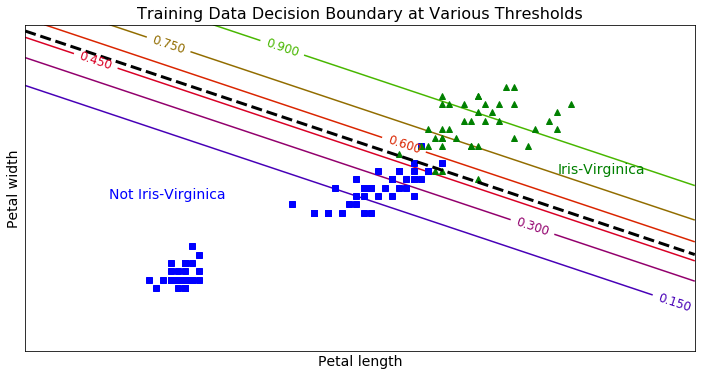

In [14]:
plt.figure(figsize=(12, 6))

plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], "bs")
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], "g^")

plt.text(-1.5, -0.1, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(2.0, 0.3, "Iris-Virginica", fontsize=14, color="g", ha="center")

# Contour plot representing class probabilities at various thresholds
decision_boundary_various_thresholds(lg_reg_clf, X_train)

# Let's superimpose the equation-based decision bounday
decision_boundary_equation_based(lg_reg_clf, X_train)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("Training Data Decision Boundary at Various Thresholds", fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

## Test Data Decision Boundary at Various Thresholds

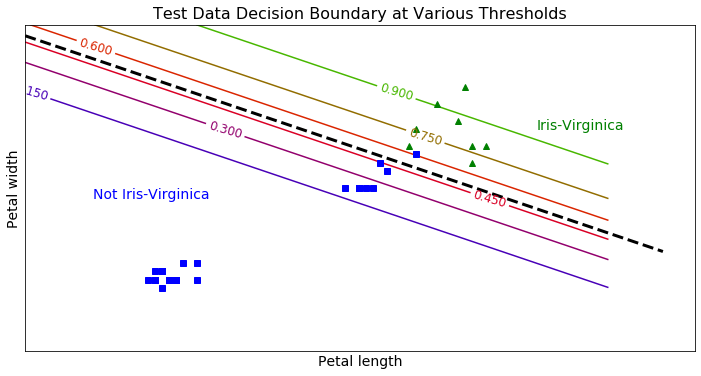

In [15]:
plt.figure(figsize=(12, 6))

plt.plot(X_test[y_test==0, 0], X_test[y_test==0, 1], "bs")
plt.plot(X_test[y_test==1, 0], X_test[y_test==1, 1], "g^")

plt.text(-1.5, -0.1, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(2.0, 1.0, "Iris-Virginica", fontsize=14, color="g", ha="center")

# Contour plot representing class probabilities at various thresholds
decision_boundary_various_thresholds(lg_reg_clf, X_test)

# Let's superimpose the equation-based decision bounday
decision_boundary_equation_based(lg_reg_clf, X_test)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("Test Data Decision Boundary at Various Thresholds", fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

## 2. Observation: Decision Bounday Using Various Thresholds for a Class Probability 


Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90% (top right). All the flowers beyond the top-right line have an over 90% chance of being Iris-Virginica according to the model.

The decision boundaries at various threshold levels reveals the scope of our solution. We get a visual understanding of how the variance of the threshold could improve the prediction.


## 3. Decision Bounday: Using Class Prediction 

We can show the decision boundary by using **different colors for different class labels**.

First, create a mesh grid of data points. Then, predict the class labels of these new data points.

Finally using the contour plot, display the class-colored data points. Samples belonging to the same class will be coded with the same color. As a consequence we will be able to visualize the **boundary between the classes by the color variance**.


To better display the class-colored data points, we will use a **filled contour plot by using the plt.contourf() function**. 

We may add a **plt.colorbar()** command, which automatically creates an additional axis with labeled color information for the plot.

For predicting class labels, we use the "predict()" function of the model.

#### Plotting the signed distance of the samples to the hyperplane

To make this plot more interesting and informative, we can draw the **signed distance of the samples to the hyperplane**.

The model provides these distance values by the function "decision_function()".

Using this function we compute the **signed distance of the samples from the grid to the hyperplane**.

Finally we create a contour plot of the signed distances on the grid.

To generate class-colored decision bounday, we write the following function. 

Note: For multi-class classification, the "plotDistanceFromHyperplane" attribute should be set to False.

In [16]:
def decision_boundary_class_colored(clf, X, plotDistanceFromHyperplane=False):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 1, X[:, 0].max() + 1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 1, X[:, 1].max() + 1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    
    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    
    # Compute the class predictions for all new points
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    
    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.summer, alpha=0.9)

    
    if(plotDistanceFromHyperplane == True):
        # Compute the signed distance of a sample to the hyperplane for all new points
        y_decision = clf.decision_function(X_new).reshape(x1.shape)

        # Generate the contourf plot for the distance of all points from the hyperplane
        plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.2)

## Training Data Decision Boundary: Class Colored

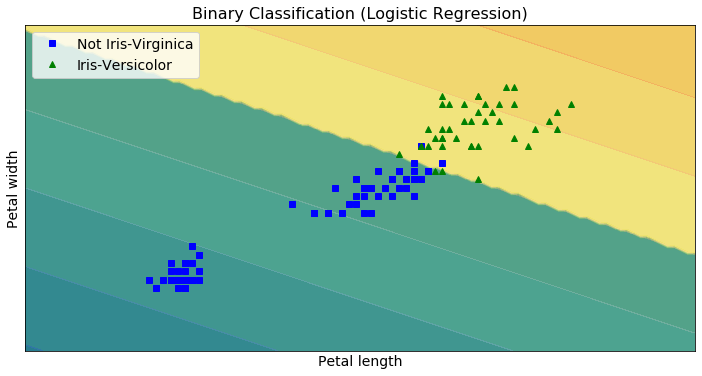

In [17]:
plt.figure(figsize=(12, 6))    

decision_boundary_class_colored(lg_reg_clf, X_train, plotDistanceFromHyperplane=True)

plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], "bs", label="Not Iris-Virginica")
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], "g^", label="Iris-Versicolor")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("Binary Classification (Logistic Regression)", fontsize=16)
plt.xticks(())
plt.yticks(())
plt.show()

## Test Data Decision Boundary: Class Colored

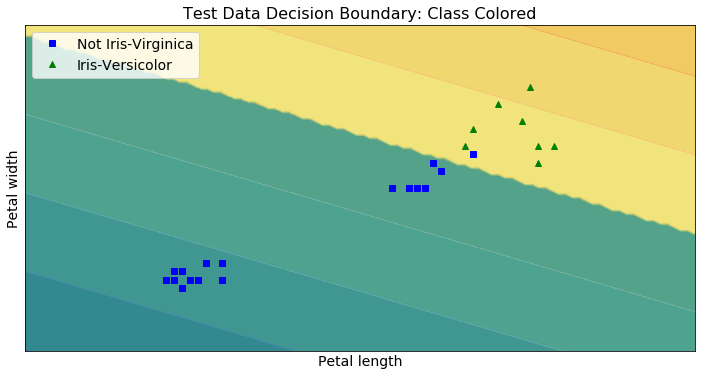

In [18]:
plt.figure(figsize=(12, 6))    

decision_boundary_class_colored(lg_reg_clf, X_test, plotDistanceFromHyperplane=True)

plt.plot(X_test[y_test==0, 0], X_test[y_test==0, 1], "bs", label="Not Iris-Virginica")
plt.plot(X_test[y_test==1, 0], X_test[y_test==1, 1], "g^", label="Iris-Versicolor")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("Test Data Decision Boundary: Class Colored", fontsize=16)
plt.xticks(())
plt.yticks(())
plt.show()